In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [2]:
# Input parameters
START_PRICE  = 200    # Starting price
STEP_PRICE   = 200     # Price to increase in each row
END_PRICE    = 100000  # Price at the end of the table

In [3]:
def fastwork_commission(price):
    # Tier 1
    tier1 = min(price,10000) * 0.17
    # Tier 2
    tier2 = min(max(0,price-10000) * 0.12,4800)
    # Tier 3
    tier3 = max(0,price-50000) * 0.07
    
    return tier1+tier2+tier3

In [4]:
df = pd.DataFrame(range(START_PRICE,END_PRICE,STEP_PRICE),columns=['Price'])

In [5]:
df['Fastwork_Commission_Fee'] = df['Price'].apply(fastwork_commission)
df['Fee_Proportion'] = df['Fastwork_Commission_Fee'] / df['Price']

In [6]:
STEP_IN_GRAPH = 5000

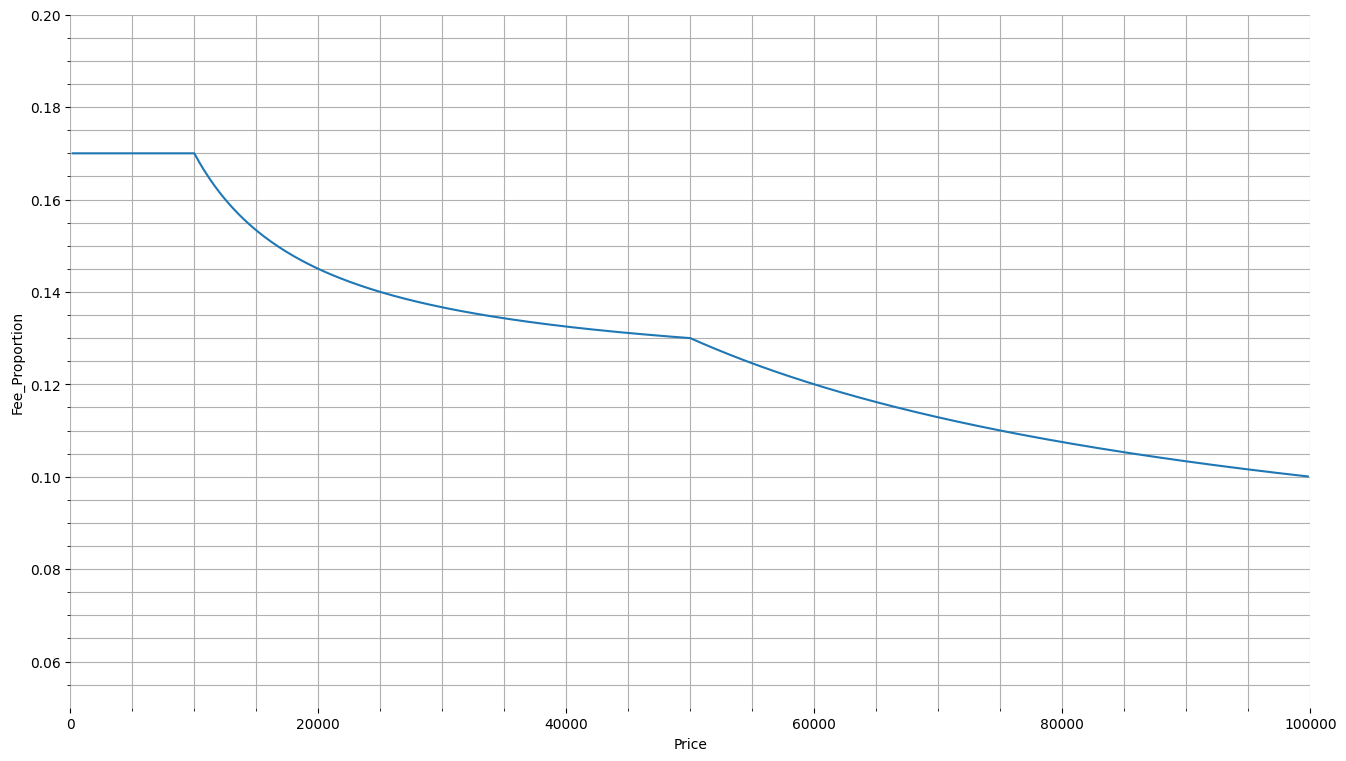

In [10]:
plt.figure(figsize=(16, 9))
ax = sns.lineplot(data=df,x="Price", y="Fee_Proportion")
ax.set_frame_on(False)
ax.tick_params(axis='both',which='both')
ax.set_ybound(lower=0.05,upper=0.2)
ax.set_xbound(lower=0,upper=100000)
ax.minorticks_on()
ax.grid(visible=True,which='both')
plt.savefig("Commission_Proportion.png")